# A Physics-based Approach To Understanding the Simplex Method

A description of **why we do what we do** while using the simplex method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Intro

I often find it easier to understand abstract mathematics when I have somthing physical to relate it to. Often with optimization problems, the analogy of a person walking up a mountain is useful.

| ![](CurveyMountain.png) |
|:--:|
| *Fig. 1: General Optimization Problem* |

Imagine a person standing at the base of a mountain with the intent to find the GPS coordinates of the peak of the mountain. If we had a simple equation for the height of the mountain, say $z = f(x,y)$, we could simply take the grandient, set it to zero, and solve for x and y. But often the equations describing the height of the mountain are complicated and had to solve in this way.

Another approach would be to take sequential steps in the upward sloping direction. This approach is often called "Gradient Descent" (descent since the problem could be reformulated to find the bottom of a valley instead of the top of a mountain).

Sometimes we place rescrictions on the mountain defining areas that we want to explore and areas we don't. Think of these like fences on the mountain that we don't want to cross. We still want to find the highest point, it just has to be highest point inside the fences. These fences are call constraints.

But there is a special class of optimzation problems were the "mountain" is just a perfectly flat plane in one direction, like shown Fig. 2. If this is the case (as is with all "linear programing" problems), we can employ another trick: We know the peak of the mountain MUST lie at the intersection of two of the fences. So instead of taking small gradual steps in the upward direction, we can simply jump from intersection to intersection. This approach is called the "Simplex" method.

| ![](LP3D_1.png) |
|:--:|
| *Fig. 2: 3-D Rendering of a Linear Programing Problem* |

Moving forward, I'll assume you have a rough understanding of how to solve a problem using the simplex method with a "simplex tableau". If you don't have any experience with the simplex method using a tableau, I highly recommend [this youtube series about it](https://www.youtube.com/watch?v=nIIJ1y_Vxzc&list=PLg2tfDG3Ww4vyVtIvTUY2JaOZDbQStcsb&index=1). It's the most comprehensive and easy to understand description I've been able to find.

But, for the purposes of understanding my physics-based approach, you only really need to watch the [4th video](https://www.youtube.com/watch?v=gSHgzykntk0&list=PLg2tfDG3Ww4vyVtIvTUY2JaOZDbQStcsb&index=4).

But the one thing I haven't been able to find a concise description of is **why we do what we do** when solving a problem using a simplex tableau. This is the point of me making this physics-based description.

So, without further ado...

## The physics-based approach

A mathematical representation of the problem shown in Fig. 2 is as follows.

$max \{ z = x + y \}$

subject to

$y \geq 0.5 x - 0.5$

$y \geq x - 2$

$y \geq 3x - 9$

$y \leq 0.2 x + 3$

$y \leq -1.5x + 9$

$y \leq x + 0.5$

And the default simplex assumption that $x, y \geq 0$ (the non-negativity assumption).

For the following plot, instead of trying to plot a 3-D plot showing the elevation of the mountain at each x and y point (like I did in Fig. 2), imagine you're in a helicopter above the mountain looking down at it. The green arrow indicates the upward direction of the mountain (the general direction we'd like to travel).

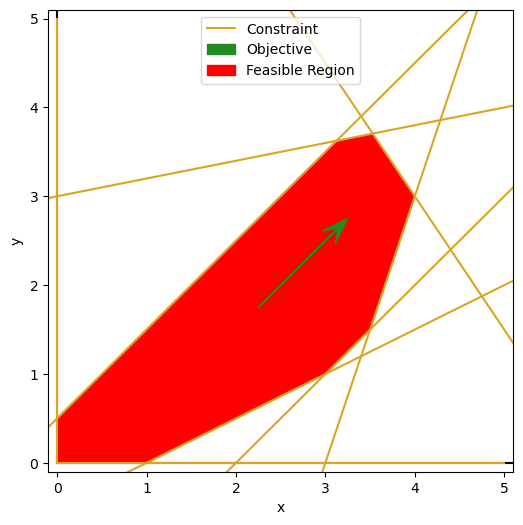

In [2]:
plt.plot([0,6],[0,0],"k")
plt.plot([0,0],[0,6],"k")

constraintColor = "goldenrod"

plt.plot([0,5],[0,0],color=constraintColor)
plt.plot([0,0],[0,5],color=constraintColor)

def plotConstraint(m,b,withLabel=False):
    xs = [-1,6]
    ys = [-m+b,m*6+b]
    if withLabel:
        plt.plot(xs,ys,color=constraintColor,label="Constraint")
    else:
        plt.plot(xs,ys,color=constraintColor)
    
plotConstraint(0.5,-0.5)
plotConstraint(1,-2)
plotConstraint(3,-9)

plotConstraint(1,0.5)
plotConstraint(0.2,3)
plotConstraint(-1.5,9,True)

objColor = "forestgreen"
plt.arrow(2.25,1.75,1,1,color=objColor,head_width=0.2,overhang=0.5,length_includes_head=True,zorder=10,label="Objective")

feasibleColor = "red"
points = [[0,0],[1,0],[3,1],[3.5,1.5],[4,3],[3.53,3.7],[3.1,3.6],[0,0.5],[0,0]]
plt.fill([x[0] for x in points],[y[1] for y in points],color=feasibleColor,label="Feasible Region",zorder=0)


plt.xlabel("x")
plt.ylabel("y")

plt.ylim(-0.1,5.1)
plt.xlim(-0.1,5.1)

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.legend();

We'll need to compute the location some vertex as we iterate through the simplex algorithm. Since this problem is 2-D a vertex is simply the intersection of two lines.

Given two lines: $y = m_1 x + b_1$ and $y = m_2 x + b_2$, their intersection is given by $\left(\frac{b_2 - b_1}{m_1 - m_2}, \frac{b_2 - b_1}{m_1 - m_2} m_1 + b_1  \right)$.

### Iteration

The simplex algorithm begins at the origin: (0,0). Since the default constraints for the simplex algorithm is that all variables must be non-negative, the initial two constraints (lines) that define our point are $x = 0$ and $y = 0$.

We could look for all the intersections in both $x=0$ and $y=0$ (each constraint defining the current vertex). But once we move to higher dimensions, this will rapidly become unreasonable since each additional dimension adds another constraint that is nececary to define a vertex. So for each additional dimension, this would add "n" times more vetrices we need to compare.

Instead, since we can move along either constraint (line) and still be in the feasible region, we will just pick the constraint whose vector is more in line with the objective vector (the green arrow in the plot above). This constraint should (hopefully) advance the objective value the fastest.

Since we're at the origin our constraints thar define our cuurnt position are simply the x and y axes. Since these defining constraint cooincide with the coordinate system, it's easy to tell which constraint is more inline with the objective function. It will correspond to the element of the the objective vector with the most positive entry.

In [3]:
objVector = [1,1]

In this case, the dot product values are equal. So we'll just pick one. I'll pick y = 0.

In [4]:
ms = [0.5,1,3,0.2,-1.5,1]
bs = [-0.5,-2,-9,3,9,0.5]

intersections = []
    
#Intersections of y = 0 with each constraint.
for i in range(len(ms)):
    intersections.append(np.array([-bs[i]/ms[i],0]))
    
print("Vertices:")
for i in range(len(intersections)):
    print(intersections[i])

Vertices:
[1. 0.]
[2. 0.]
[3. 0.]
[-15.   0.]
[6. 0.]
[-0.5  0. ]


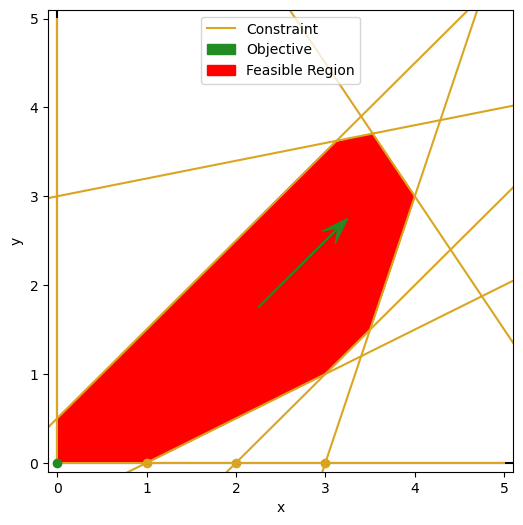

In [5]:
plt.plot([0,6],[0,0],"k")
plt.plot([0,0],[0,6],"k")

constraintColor = "goldenrod"

plt.plot([0,5],[0,0],color=constraintColor)
plt.plot([0,0],[0,5],color=constraintColor)

def plotConstraint(m,b,withLabel=False):
    xs = [-1,6]
    ys = [-m+b,m*6+b]
    if withLabel:
        plt.plot(xs,ys,color=constraintColor,label="Constraint")
    else:
        plt.plot(xs,ys,color=constraintColor)
    
for i in range(len(ms)):
    if i == len(ms)-1:
        plotConstraint(ms[i],bs[i],True)
    else:
        plotConstraint(ms[i],bs[i])
        
for x,y in intersections:
    plt.scatter([x,],[y,],color=constraintColor)
    
plt.scatter([0,],[0,],color="forestgreen",zorder=11)

objColor = "forestgreen"
plt.arrow(2.25,1.75,1,1,color=objColor,head_width=0.2,overhang=0.5,length_includes_head=True,zorder=10,label="Objective")

feasibleColor = "red"
points = [[0,0],[1,0],[3,1],[3.5,1.5],[4,3],[3.53,3.7],[3.1,3.6],[0,0.5],[0,0]]
plt.fill([x[0] for x in points],[y[1] for y in points],color=feasibleColor,label="Feasible Region",zorder=0)


plt.xlabel("x")
plt.ylabel("y")

plt.ylim(-0.1,5.1)
plt.xlim(-0.1,5.1)

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.legend();

Note here that the nececity of only picking the vertex with the smallest "distance" keeps us in the feasbile region.

This suggests that we should move our base vertex to the point defined by $y = 0$ and $y = 0.5x - 0.5$: (1,0).

If we were to pick any of the other vertices, we'd move outside the feasible region.

Also note that we're only interested in vertices with a positive "distance" since any vertices with a negative "distance" would detract from the objective value and would move us outside the feasible region.

Again, since we're conveniently at the origin with vertex-defining constraints that coincide with the axes, it's easy to define "distance" as simply the x value of the propsed vertex (or y, if we would have decided to travel down the y axis).

In [6]:
baseVertex = np.array([0,0])

distances = np.array([vert[0] for vert in intersections])
    
#We want the smallest positive value
indexToChoose = np.where(distances > 0, distances, np.inf).argmin()

print("VertexToChoose:",intersections[indexToChoose])

VertexToChoose: [1. 0.]


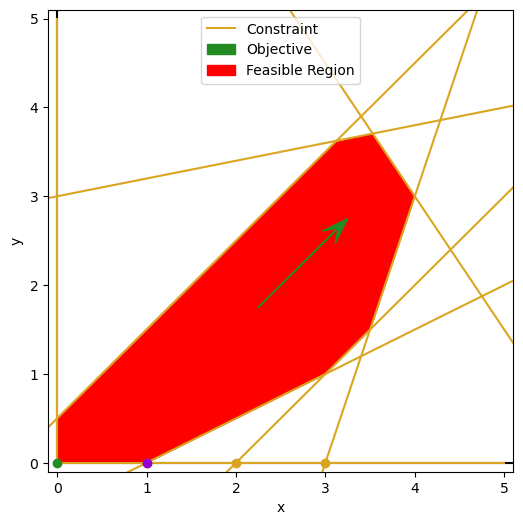

In [7]:
plt.plot([0,6],[0,0],"k")
plt.plot([0,0],[0,6],"k")

constraintColor = "goldenrod"

plt.plot([0,5],[0,0],color=constraintColor)
plt.plot([0,0],[0,5],color=constraintColor)

def plotConstraint(m,b,withLabel=False):
    xs = [-1,6]
    ys = [-m+b,m*6+b]
    if withLabel:
        plt.plot(xs,ys,color=constraintColor,label="Constraint")
    else:
        plt.plot(xs,ys,color=constraintColor)
    
for i in range(len(ms)):
    if i == len(ms)-1:
        plotConstraint(ms[i],bs[i],True)
    else:
        plotConstraint(ms[i],bs[i])
        
for x,y in intersections:
    plt.scatter([x,],[y,],color=constraintColor)
    
plt.scatter([0,],[0,],color="forestgreen",zorder=11)
plt.scatter([intersections[indexToChoose][0],],[intersections[indexToChoose][1],],color="darkviolet",zorder=11)

objColor = "forestgreen"
plt.arrow(2.25,1.75,1,1,color=objColor,head_width=0.2,overhang=0.5,length_includes_head=True,zorder=10,label="Objective")

feasibleColor = "red"
points = [[0,0],[1,0],[3,1],[3.5,1.5],[4,3],[3.53,3.7],[3.1,3.6],[0,0.5],[0,0]]
plt.fill([x[0] for x in points],[y[1] for y in points],color=feasibleColor,label="Feasible Region",zorder=0)


plt.xlabel("x")
plt.ylabel("y")

plt.ylim(-0.1,5.1)
plt.xlim(-0.1,5.1)

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.legend();

The vertex we should move to is indicated by the violet point on the diagram above.

We could simply shift our base vertex to this new position (move the green point to the violet point) and repeat. But we quickly run into a complication. For the 1st iteration, we took advnatage of the non-negativity constraint to tell us which possible ways we have to travel: We must travel in the $(1,0)$ or $(0,1)$ directions. The non-negativity constraints make it easy to decide the directions since we can't travel in the $(-1,0)$ or $(0,-1)$ directions without leaving the feasible region.

But if we move away from the origin, we can't rely on these nonnegativity constraints to tell us which direction to travel. We could define some sort of algorithm to ensure that our proposed traveling directions allways stay within the feasible region, but such an algorithm would either A) get pretty complicated once we move to higher dimensions or B) be reducible to the algorithm I'm about to propose.

In order to describe what we should do, we need to first cover a trick used all the time in linear programing: Slack variables.

The fesiable region is defined using a series of inequalities (equality constraints can simply be modeled as a "less than" inequality and a "greater than" inequality that cover the same space). An inequality can be transformed into an equality using a slack variable. $f(x,y) <= k$ produces $f(x+y) + s = k$. Where $s$ is a slack variable. Whenever the base vertex does not lie on the line defined by a constraint, the slack variable of that constraint is nonzero. 

Consider our original base vertex $(0,0)$ and the constraint $y >= 0.5 x - 0.5$. The constraint can be re-written as $-y + 0.5x + s_1 = 0.5$ where, in our case, $s_1 = 0.5$. These slack variables are defined in a way that they also follow the standard simplex non-negativity constraint.

When we move from our original base vertex $(x = 0, y = 0)$ to the newly proposed vertex (the purple point in the diagram above), we're moving to $(x = 0.5, y = 0)$. But it could also be said that we're moving to the vertex $(s_1 = 0, y = 0)$. This is becuase the new vertex lies exactly ON the constraint $-y + 0.5x + s_1 = 0.5$: The value of $s_1$ is zero.

So, bear with me for one second, if we pivot our problem from looking at it in the $x,y$ coordinate system to looking at it in the $s_1,y$ coordinate system, the proposed move will actually move us **back to the "origin"**. 

This sounds a little crazy, but the math behind it is relatively simple. Take the constriant that we're trying to move to: $-y + 0.5x + s_1 = 0.5$. Shifting our viewpoint from the $x,y$ coordinate system to the $s_1,y$ coordinate system simply involves finding a relationship $s_1(x,y)$ ($s_1$ as a function of $x$ and $y$). This relationship is already given by the constraint equation, we just need to albegraically shift it around: $s_1 = 0.5 + y - 0.5x$.

Taking all of the points, lines, arrows, and shaded regions shown on the previous diagram and applying this coordinate system transformation produces the following diagram:

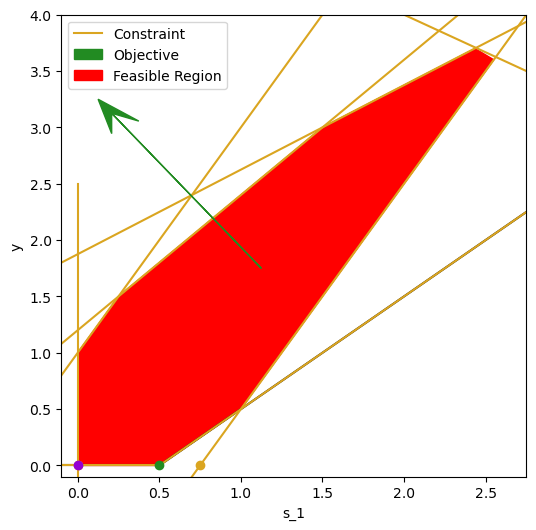

In [8]:
#We need to do a coordinate transformation from x-y coordinates to s_1-y coordinates.

# Given the original relationship -1 y + 0.5 x + s1 = 0.5
k = 0.5
cx = 0.5
cy = -1

def TransformPoint(point):
    x,y = point
    return (k - cy * y - cx * x,y)

def plotTransformed(xs,ys,*args,**kwargs):
    ss = [TransformPoint([xs[i],ys[i]])[0] for i in range(len(xs))]
    plt.plot(ss,ys,*args,**kwargs)
    
def scatterTransformed(xs,ys,*args,**kwargs):
    ss = [TransformPoint([xs[i],ys[i]])[0] for i in range(len(xs))]
    plt.scatter(ss,ys,*args,**kwargs)
    
def arrowTransformed(x,y,dx,dy,*args,**kwargs):
    s = TransformPoint([x,y])[0]
    x2 = x + dx
    y2 = y + dy
    s2 = TransformPoint([x2,y2])[0]
    ds = s2 - s
    plt.arrow(s,y,ds,dy,*args,**kwargs)
    
def fillTransformed(xs,ys,*args,**kwargs):
    ss = [TransformPoint([xs[i],ys[i]])[0] for i in range(len(xs))]
    plt.fill(ss,ys,*args,**kwargs)
        

plotTransformed([0,6],[0,0],"k")
plotTransformed([0,0],[0,6],"k")

constraintColor = "goldenrod"

plotTransformed([0,5],[0,0],color=constraintColor)
plotTransformed([0,0],[0,5],color=constraintColor)

def plotConstraint(m,b,withLabel=False):
    xs = [-1,6]
    ys = [-m+b,m*6+b]
    if withLabel:
        plotTransformed(xs,ys,color=constraintColor,label="Constraint")
    else:
        plotTransformed(xs,ys,color=constraintColor)
    
for i in range(len(ms)):
    if i == len(ms)-1:
        plotConstraint(ms[i],bs[i],True)
    else:
        plotConstraint(ms[i],bs[i])
        
for x,y in intersections:
    scatterTransformed([x,],[y,],color=constraintColor)
    
scatterTransformed([0,],[0,],color="forestgreen",zorder=11)
scatterTransformed([intersections[indexToChoose][0],],[intersections[indexToChoose][1],],color="darkviolet",zorder=11)

objColor = "forestgreen"
plt.arrow(*TransformPoint([2.25,1.75]),-1,3/2,color=objColor,head_width=0.2,overhang=0.5,length_includes_head=True,zorder=10,label="Objective")

feasibleColor = "red"
points = [[0,0],[1,0],[3,1],[3.5,1.5],[4,3],[3.53,3.7],[3.1,3.6],[0,0.5],[0,0]]
fillTransformed([x[0] for x in points],[y[1] for y in points],color=feasibleColor,label="Feasible Region",zorder=0)


plt.xlabel("s_1")
plt.ylabel("y")

plt.ylim(-0.1,4)
plt.xlim(-0.1,2.75)

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.legend();

See how moving from the green point to the violet point moves us back to the origin in the new coordinate system?

Also observe that the objective function now points in a new direction!

Once we're here, we simply need to repeat the iteration described above in this coordinate system to generate what the next movement should be.

Before I go ahead and show you what each one of these steps look like, let's take a minute to compare how this "physical" algorithm comprised of vectors and coordinate transformations relates to the simplex tableau method.

### Simplex Tableau Analog

The simplex talbeau of this problem is as follows:

*Note that if you watch the youtube series about simplex talbeaus given in the intro of this document, I do things just slightly different in my implementation of the tableau. Namely two things: 1) I omit the "P" column since it doesn't constribute to the final tableau overall. It's mostly there to remind us that the objective row corresponds to the objective function. 2) I place the objective row at the bottom of the tableau instead of the top.*

$\begin{array}{cccccccc|c}
       x   & y    &  s_1 & s_2 & s_3 & s_4 & s_5 & s_6  & CONSTANT \\
\hline 0.5 & -1   & 1    & 0   & 0   & 0    & 0  & 0    & 0.5      \\
       1   & -1   & 0    & 1   & 0   & 0    & 0  & 0    & 2        \\
       3   & -1   & 0    & 0   & 1   & 0    & 0  & 0    & 9        \\
       -0.2& 1    & 0    & 0   & 0   & 1    & 0  & 0    & 3        \\
       1.5 & 1    & 0    & 0   & 0   & 0    & 1  & 0    & 9        \\
       -1  & 1    & 0    & 0   & 0   & 0    & 0  & 1    & 0.5      \\
\hline -1  & -1   & 0    & 0   & 0   & 0    & 0  & 0    & 0        \\
\end{array}$

Each row represents an equation in the model where each variable multiplied by it's respective coefficient in each row is summed to equal a positive constant in the constant column.

The bottom row, which I'll call the objective row, represents the objective function multiplied by negative one.

Since x and y are non-basic in this tableau (their columns are not full of zeros except for one entry), $x = 0$ and $y = 0$ under the current configuration.

Just like step 1 in the "physical" decription above, the first thing we need to do is pick a constraint to travel down. Using the physical method, we did this by finfing the most positive component of the objective vector. In the exact same way, the direction is indicated in the tableau by which variable has the most negative coefficient in the objective row (negative since we multiplied the objective function by negative one).

At first, this might seem different than the physical method. In the physical method we selected a constraint (row of the tableau) to travel down to determine the direction. In the tableau method we select a variable (column of the tableau) to pivot down (i.e. to "travel down"). But, upon further inspection, we can conclude that the constraint we wanted to travel down in the physical method ($y = 0$) is actually represented by the fact that the $x$ column of the tableau is nonbasic. So by selecting the $x$ column to travel down, we are actually selecting to travel down the $y = 0$ constraint.

Like step 2 in the physical method, the next thing we need to do in the tableau method is select how far down the given constraint to travel. In the phsycial method, we selected to stop at the vertex whose "distance" was the smallest positive quantity. We did this to ensure that we didn't step outside the feasbile region. In the tableau method we follow the same logic. We need to select a vertex to stop at. Remember that once we perform the pivot of the simplex talbeau, the column we selected in step 1 will enter the basis (in our case allowing x to become nonzero). But in it's place we select a variable to exit the basis. This exiting variable is determined by which column (variable) in the basis has it's nonzero value (usually 1) in the row we select. The distance we travel between these two vertices is given by the value in the constant column divided by the value in the pivot column for each row. We select the smallest positive value from these options: The smallest positive distance to travel.

For example, in the tableau above this is the pivot we'd perform.

$\begin{array}{cccccccc|cccc}
       x   & y    &  s_1 & s_2 & s_3 & s_4 & s_5 & s_6  & CONSTANT & & "distance" \\
\hline *0.5* & -1   & 1    & 0   & 0   & 0    & 0  & 0    & 0.5      & & \frac{0.5}{0.5} = 1 & \leftarrow \\
       1   & -1   & 0    & 1   & 0   & 0    & 0  & 0    & 2        & & \frac{2}{1} = 2\\
       3   & -1   & 0    & 0   & 1   & 0    & 0  & 0    & 9        & & \frac{9}{3} = 3\\
       -0.2& 1    & 0    & 0   & 0   & 1    & 0  & 0    & 3        & & \frac{3}{-0.2} = -15\\
       1.5 & 1    & 0    & 0   & 0   & 0    & 1  & 0    & 9        & & \frac{9}{1.5} = 6\\
       -1  & 1    & 0    & 0   & 0   & 0    & 0  & 1    & 0.5      & & \frac{0.5}{-1} = -0.5\\
\hline -1  & -1   & 0    & 0   & 0   & 0    & 0  & 0    & 0        & & \\
      \uparrow
\end{array}$

The constraint $x = 0$ exits the basis and is repalced by the constraint $s_1 = 0$ (i.e. $y = 0.5 x - 0.5$), since $s_1$ is no longer in the basis. 

Note that the "distances" are the actual distances along the $y = 0$ constraint that we travel.

We're left with the following tableau.

$\begin{array}{cccccccc|c}
       x   & y    &  s_1 & s_2 & s_3 & s_4 & s_5 & s_6  & CONSTANT\\
\hline 1   & -2   & 2    & 0   & 0   & 0    & 0  & 0    & 1   \\
       0   & 1    & -2   & 1   & 0   & 0    & 0  & 0    & 1       \\
       0   & 5    & -6   & 0   & 1   & 0    & 0  & 0    & 6       \\
       0   & 3/5  & 2/5  & 0   & 0   & 1    & 0  & 0    & 17/5       \\
       0   & 4    & -3   & 0   & 0   & 0    & 1  & 0    & 7.5       \\
       0   & -1   & 2    & 0   & 0   & 0    & 0  & 1    & 1.5     \\
\hline 0   & -3   & 2    & 0   & 0   & 0    & 0  & 0    & 1       \\
\end{array}$

Notice how the represnetation of each constraint has now changed along with the representation of the objective function.

This is because when we "pivoted" the tableau, we did exactly what we did in the physical method: We changed our coordinate system to be defined in terms of the non-basic variables. In this case, the coordinate system is now $(s_1,y)$ instead of $(x,y)$.

In this new coordinate system, the objective function points in a different direction, just like we observed using the physical method.

### Wrapping up the physical method

Given a coordinate $(x,y)$ and the definition $c_{y,i} y + c_{x,i} x +  c_{s_i,i} s_i = k_i$, the transformed coordinates in $(s_i,y)$ would be $(\frac{k_i - c_{y,i} y - c_{x,i} x}{c_{s_i,i}}, y)$

Given another constraint $c_{y,j} y + c_{x,j} x + c_{s_j,j} s_j = k_j'$, this constraint can be mapped into the new coordinate system by taking a linear combination of the given constraint equation and the coordinate-defining constraint in such a way that the variable that is leaving the coordinate system (in out case, x) is elminiated from the other constraint.

Since we can multiply both sides of an equation by a connstant at any time, it is easier to comprehend if we give the variable leaving the coordinate system (in our case, x) a coefficient of 1 in the coordinate-defining constraint: $\frac{c_{y,i}}{c_{x,i}} y + x + \frac{c_{s_i,i}}{c_{x,i}} s_i = \frac{k_i}{c_{x,i}}$

Then we can eliminate x from each other constraint (finializing the coordinate transformation) by adding a multiple of this coordinate-defining constraint to each given constraint:

$c_{y,j}' = c_{y,j} \left(1 - \frac{c_{y,i}}{c_{x,i}} \right)$

$c_{x,j}' = c_{x,j} \left(1 - \frac{c_{x,i}}{c_{x,i}} \right) = 0$

$c_{s_j,j}' = c_{s_j,j} \left(1 - \frac{c_{s_j,i}}{c_{x,i}} \right)$

Where $i$ is the coordinate-defining constraint and $j\ (\neq i)$ is each other constraint.

To wrap up the theory, note that this coordinate transformation is precisely what happens when you pivot a simplex tableau.

Thus, **the "phsyical" method and the talbeau method are actually the exact same method**.

In the physical method, we talked about a coordinate system that changes each iteration. Another name for a coordinate system is a basis. By convention, the variables that are not in the "basis" are the variables that define the related coordiante system. A little confusing, I know. But that's the convention.


To drive the point home, here is a fully completed example showing each physical movement from vertex to vertex in addition to the parallel simplex tableau.

In [9]:
from llist import sllist

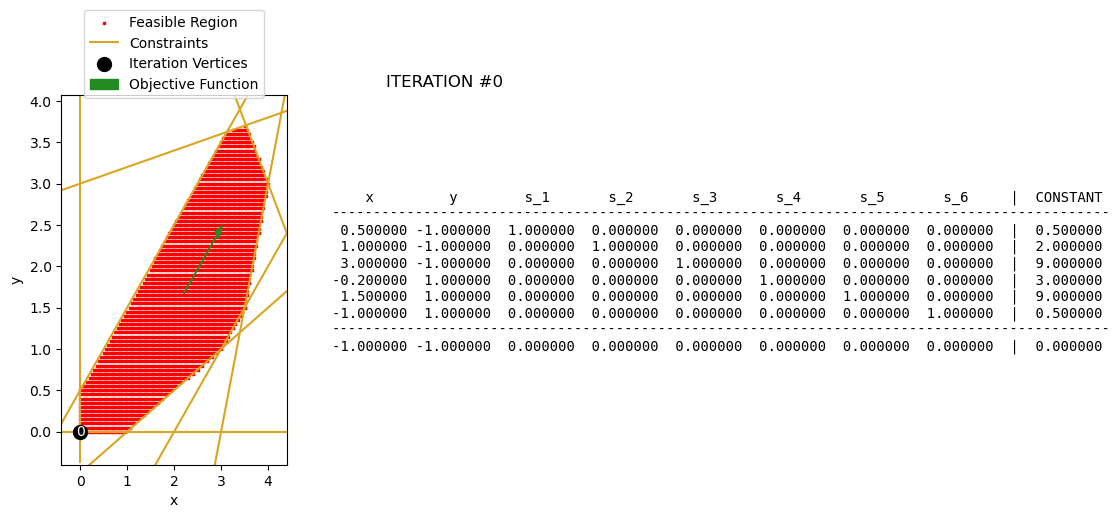

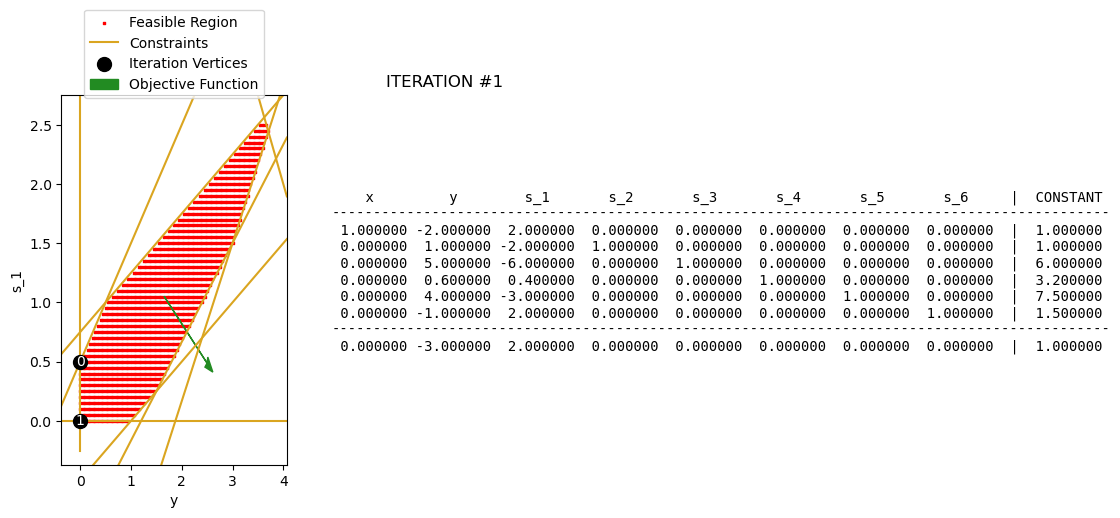

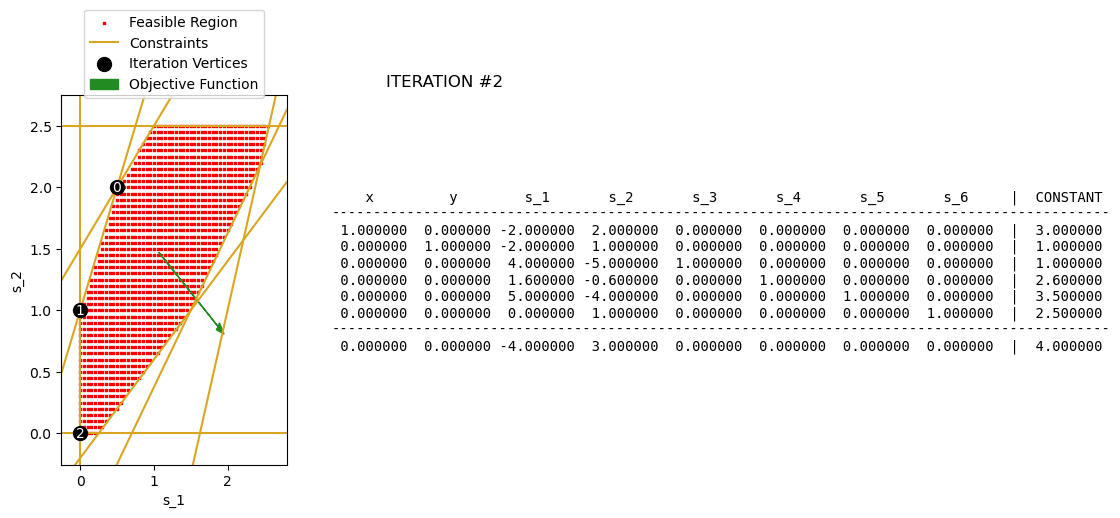

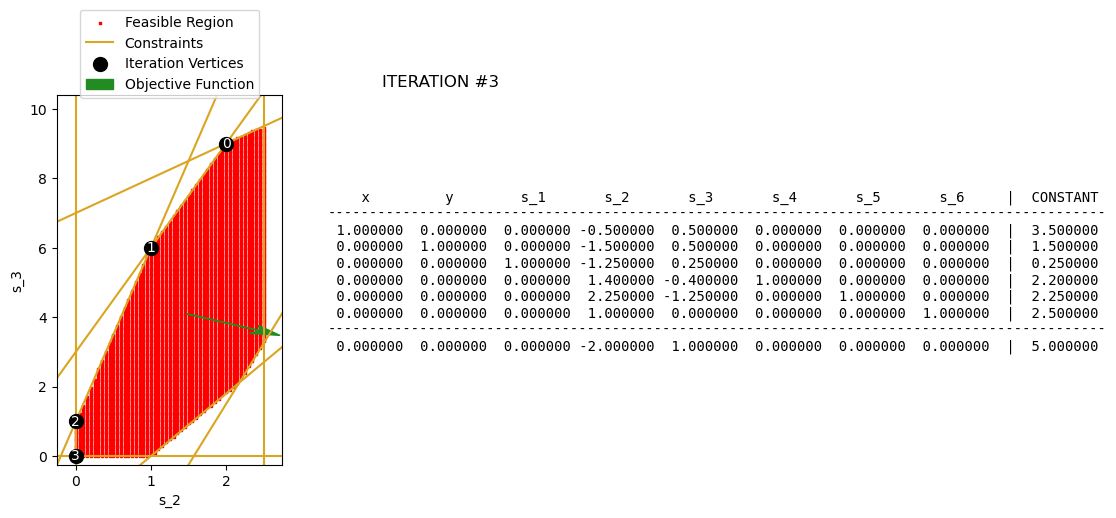

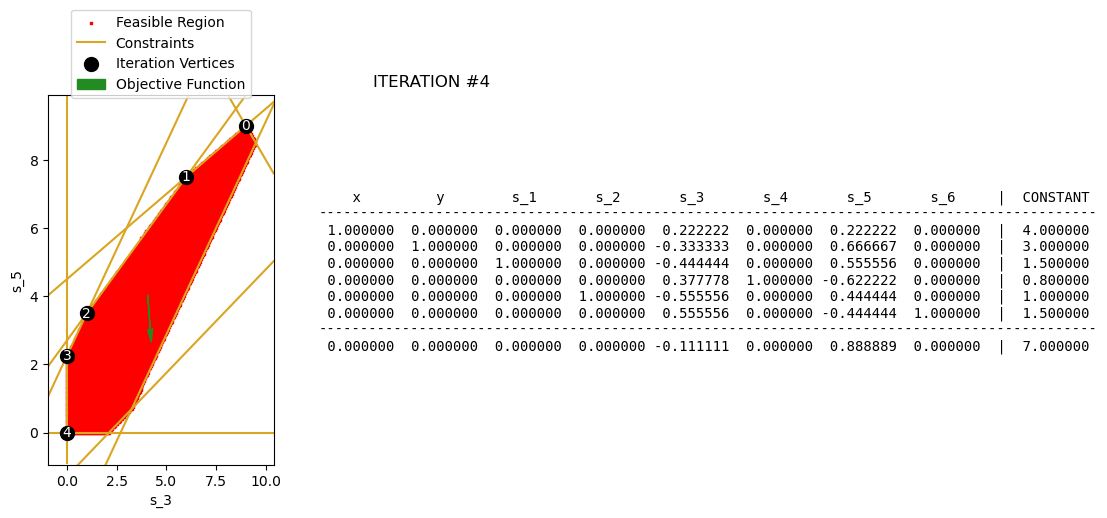

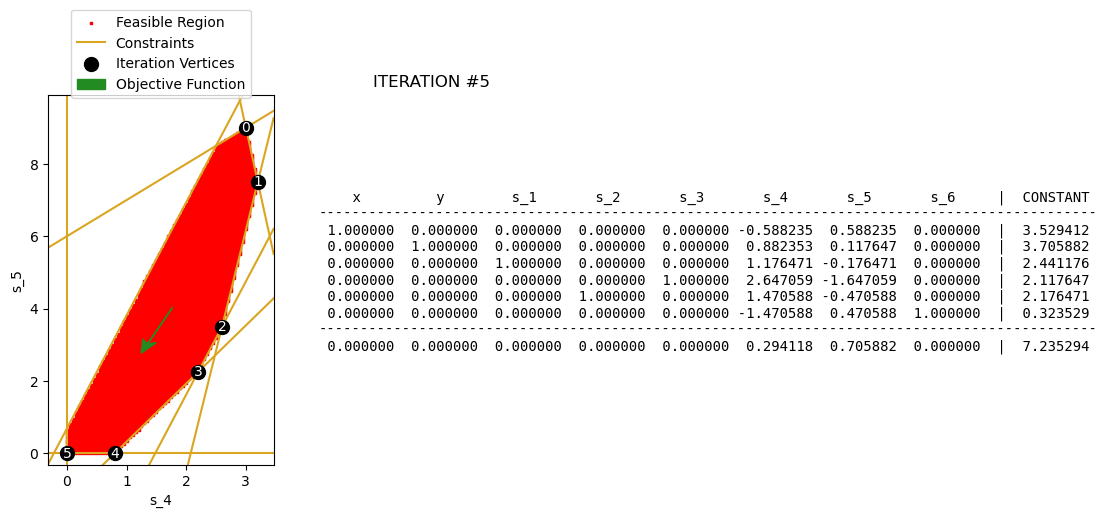

In [10]:
varNames = "x,y,s_1,s_2,s_3,s_4,s_5,s_6,CONSTANT".split(',')

tableau = [
    [0.5,-1,1,0,0,0,0,0,0.5],
    [1,-1,0,1,0,0,0,0,2],
    [3,-1,0,0,1,0,0,0,9],
    [-0.2,1,0,0,0,1,0,0,3],
    [1.5,1,0,0,0,0,1,0,9],
    [-1,1,0,0,0,0,0,1,0.5],
    [-1,-1,0,0,0,0,0,0,0]
]

numVar = 8
numConstr = 6

pointsAlreadyExplored = set([])
feasiblePoints = sllist([]) #This linked-list. think about it as a high-efficiency list

previousVertices = []

def evaluateCurrentVertex():
    vertex = np.zeros(numVar)
    
    for i in range(numVar):
        isInBasis = True
        indexOfNonzeroEntry = None
        for j in range(numConstr):
            if abs(tableau[j][i]) > 1e-7:
                if indexOfNonzeroEntry == None:
                    indexOfNonzeroEntry = j
                else:
                    isInBasis = False
                    break
        if isInBasis:
            vertex[i] = tableau[indexOfNonzeroEntry][-1] / tableau[indexOfNonzeroEntry][i]
        else:
            vertex[i] = 0
            
    return vertex

previousVertices.append(evaluateCurrentVertex())
        
        

def GetNeighboringFillPoints(x,y,xBasisIndex,yBasisIndex,dx,dy):
    global tableau, feasiblePoints, pointsAlreadyExplored
    
    pointHash = "{:.5e}{:.5e}".format(x,y)
    
    if pointHash in pointsAlreadyExplored:
        return
    else:
        pointsAlreadyExplored.add(pointHash)
        
    #Check to see if this point is in the feasible region.
    #If it's not, just return
    for j in range(numConstr):
        if x * tableau[j][xBasisIndex] + y * tableau[j][yBasisIndex] >= tableau[j][-1]:
            return
        
    #If it is in the feasible region, add it to the list of feasible points and test it's children
    feasiblePoints.append([x,y])
    
    GetNeighboringFillPoints(x+dx,y,xBasisIndex,yBasisIndex,dx,dy)
    GetNeighboringFillPoints(x,y+dy,xBasisIndex,yBasisIndex,dx,dy)

def DisplayAll():
    global tableau, feasiblePoints, pointsAlreadyExplored, origins
    
    fig, axes = plt.subplots(1,2)
    ax1, ax2 = axes
    
    #Part 1: The coordinate diagram showing the current configuration
    # 1-a find the basis variables:
    basisIndices = []
    for i in range(numVar):
        numNonzeroEntries = 0
        for j in range(numConstr):
            if abs(tableau[j][i]) > 1e-7: #A quick and easy way to see if a floating point number is equal to zero.
                numNonzeroEntries += 1
        if numNonzeroEntries > 1:
            basisIndices.append(i)
            
    assert len(basisIndices) == 2
            
    #The "y" variable is the second basis variable
    #The "x" variable is the first basis variable
    ax1.set_xlabel(varNames[basisIndices[0]])
    ax1.set_ylabel(varNames[basisIndices[1]])
    
    #First, we'll plot the feasible region.
    #A quick-and-easy (to code) yet horribly inefficient (execution) way to find the feasible region.
    fillDx = 0.05
    fillDy = 0.05
    feasiblePoints = sllist([]) #clear
    pointsAlreadyExplored = set([]) #clear
    GetNeighboringFillPoints(0,0,*basisIndices,fillDx,fillDy)
    
    maxX = 0
    maxY = 0
    
    numPoints = len(feasiblePoints)
    
    feasibleXs = np.zeros(numPoints)
    feasibleYs = np.zeros(numPoints)
    
    
    for i in range(numPoints):
        p = feasiblePoints.pop()
        x,y = p
        if x > maxX:
            maxX = x
        if y > maxY:
            maxY = y
            
        feasibleXs[i] = x
        feasibleYs[i] = y
        
    minX = -maxX/10
    minY = -maxY/10
    maxX *= 1.1
    maxY *= 1.1
        
    ax1.scatter(feasibleXs,feasibleYs,s=0.6,marker='s',color="red",label="Feasible Region")
    
    #Plot each constarint
    for j in range(numConstr):
        if tableau[j][basisIndices[1]] == 0:
            #This is a vertical line
            x = tableau[j][-1] / tableau[j][basisIndices[0]]
            ax1.plot([x,x],[minY,maxY],color="goldenrod")
        else:
            #We'll plot a line from "x" = 0 to "x" = maxX
            #cy * y + cx * x = k => y = (k - x * cx) / cy
            
            xs = [minX,maxX]
            ys = [(tableau[j][-1] - minX * tableau[j][basisIndices[0]]) / tableau[j][basisIndices[1]], (tableau[j][-1] - maxX * tableau[j][basisIndices[0]]) / tableau[j][basisIndices[1]]]

            ax1.plot(xs,ys,color="goldenrod")
        
    ax1.plot([minX,maxX],[0,0],color="goldenrod")
    ax1.plot([0,0],[minY,maxY],color="goldenrod",label="Constraints")
        
    #Plot past vertices
    for i in range(len(previousVertices)):
        v = previousVertices[i]
        pos = [v[basisIndices[0]],],[v[basisIndices[1]],]
        if i == 0:
            ax1.scatter(*pos,s=100,color="black",zorder=10,label="Iteration Vertices")
        else:
            ax1.scatter(*pos,s=100,color="black",zorder=10)
        ax1.text(v[basisIndices[0]],v[basisIndices[1]],str(i),horizontalalignment='center',verticalalignment='center',zorder=11,color="white")
        
    #Plot the objective vector
    centerX = np.average(feasibleXs)
    centerY = np.average(feasibleYs)
    
    dx = -tableau[-1][basisIndices[0]]
    dy = -tableau[-1][basisIndices[1]]
    
    mag = np.sqrt(dx**2 + dy**2)
    dx /= mag
    dy /= mag
    
    arrowSize = 0.1*max([maxY,maxX])/4
    ax1.arrow(centerX,centerY,dx,dy,color="forestgreen",head_width=arrowSize,overhang=arrowSize,label="Objective Function")
        
    ax1.set_xlim(minX,maxX)
    ax1.set_ylim(minX,maxY)
    #ax1.set_aspect('equal')
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25))
    
    #Part 2: The tableau
    tableauStr = ""
    
    cellWidth = 0
    for v in varNames:
        if len(v) + 2 > cellWidth:
            cellWidth = len(v) + 2
    cellStr = "{:^" + str(cellWidth) + "s}"
    
    def formatFloat(f):
        return cellStr.format("{:.6f}".format(f))
            
    
    for v in varNames[:-1]:
        tableauStr += cellStr.format(v)
    tableauStr += " | " + cellStr.format(varNames[-1]) + "\n"
    tableauStr += "-" * ((len(varNames))*cellWidth + 3) + "\n"
        
    
    for j in range(numConstr):
        for i in range(numVar):
            tableauStr += formatFloat(tableau[j][i])
        tableauStr += " | " + formatFloat(tableau[j][-1]) + "\n"
        
    tableauStr += "-" * ((len(varNames))*cellWidth + 3) + "\n"
        
    for i in range(numVar):
        tableauStr += formatFloat(tableau[-1][i])
    tableauStr += " | " + formatFloat(tableau[-1][-1]) + "\n"
    
    #plt.rc('text', usetex=True)
    ax2.text(0.0,0.5,tableauStr,ha="left",va="center",size=10,family="monospace")
    ax2.set_xticks([])
    ax2.set_yticks([])
    for s in ['top','right','bottom','left']:
        ax2.spines[s].set_visible(False)
        
    plt.title("ITERATION #{}".format(len(previousVertices)-1))
    
    plt.show()
    
DisplayAll()

def PerformIteration():
    #Step 1: Compute the pivot column
    pivotCol = np.argmin(tableau[-1])
    
    #Step 2: Compute the pviot row
    comparisonValues = np.array([np.infty if tableau[j][pivotCol] == 0 else tableau[j][-1] / tableau[j][pivotCol] for j in range(numConstr)])
    pivotRow = np.where(comparisonValues > 0, comparisonValues, np.inf).argmin()
    
    pivotValue = tableau[pivotRow][pivotCol]
    
    #Step 3: Divide the pivot row by the pivot value
    for i in range(numVar + 1):
        tableau[pivotRow][i] /= pivotValue
        
    #Step 4: Make the rest of the values in the pivot column 0 by using a linear combination of the pivot row.
    for j in range(numConstr + 1):
        if j == pivotRow:
            continue
            
        multiplicationValue = -tableau[j][pivotCol]
            
        for i in range(numVar + 1):
            tableau[j][i] += multiplicationValue * tableau[pivotRow][i]
    
def TableauIsOptimal():
    for i in range(numVar):
        if tableau[-1][i] < 0:
            return False
    return True
    
while not TableauIsOptimal():  
    PerformIteration()
    previousVertices.append(evaluateCurrentVertex())
    DisplayAll()

Note that at the final step the tableau will have all positive values in the bottom row. This indicates that we've reached the optimal solution.

On the physical plot of what's going on, we see that our current vertex is the origin, but the objective function points in the negative direction for both of the non-basic variables (pointing toward the 3rd quadrant). Since all variables have a non-negativity constraint, we cannot move in the negative direction. Thus there is no direction we can move that will improve the objective. That's how we know we've reached the optimal position.